##  Battle of Neighborhoods (Opening a Bakery Store in Santiago)

In [51]:
import sys
!{sys.executable} -m pip install geocoder
!{sys.executable} -m pip install folium

In [52]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [53]:
from bs4 import BeautifulSoup 

In [54]:

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import geocoder # import geocoder
import requests 
from bs4 import BeautifulSoup 
import xml
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

from IPython.display import display_html

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium as folium# map rendering library

### Extract data form webpages

In [55]:
source1 = requests.get('https://es.wikipedia.org/wiki/Anexo:Comunas_de_Chile').text
soup1=BeautifulSoup(source1,'lxml')
print(soup1.title)
from IPython.display import display_html
tab1 = str(soup1.table)
display_html(tab1,raw=True)

<title>Anexo:Comunas de Chile - Wikipedia, la enciclopedia libre</title>


CUT (Código Único Territorial)
 
 Nombre
 
 
 
 Provincia
 
 Región
 
 Superficie (km²)
 
 Población 2020
 
 Densidad (hab./km²)
 
 IDH 2005
 
 Latitud
 
 Longitud
 
 
 15101 
 Arica 
 
 
 
 Arica 
 
 <img alt="Bandera de la Región de Arica y Parinacota" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Arica_y_Parinacota%2C_Chile.svg/20px-Flag_of_Arica_y_Parinacota%2C_Chile.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Arica_y_Parinacota%2C_Chile.svg/30px-Flag_of_Arica_y_Parinacota%2C_Chile.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Arica_y_Parinacota%2C_Chile.svg/40px-Flag_of_Arica_y_Parinacota%2C_Chile.svg.png 2x" title="Bandera de la Región de Arica y Parinacota" width="20"/>  Arica y Parinacota 
 
 4.799,4
 
 247.552
 
 51.6
 
 0.866
 
 Alto 
 
 -18°27'18"
 
 -70°17'24"
 
 
 15102 
 Camarones 
 
 <img alt="Escudo de Camarones" data-file-height="831" data-file-width="600" decoding="async" height="30" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Escudo_de_Camarones_%28Chile%29.svg/22px-Escudo_de_Camarones_%28Chile%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Escudo_de_Camarones_%28Chile%29.svg/32px-Escudo_de_Camarones_%28Chile%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Escudo_de_Camarones_%28Chile%29.svg/43px-Escudo_de_Camarones_%28Chile%29.svg.png 2x" width="22"/> 
 
 Arica 
 
 <img alt="Bandera de la Región de Arica y Parinacota" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Arica_y_Parinacota%2C_Chile.svg/20px-Flag_of_Arica_y_Parinacota%2C_Chile.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Arica_y_Parinacota%2C_Chile.svg/30px-Flag_of_Arica_y_Parinacota%2C_Chile.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Arica_y_Parinacota%2C_Chile.svg/40px-Flag_of_Arica_y_Parinacota%2C_Chile.svg.png 2x" title="Bandera de la Región de Arica y Parinacota" width="20"/>  Arica y Parinacota 
 
 3.927
 
 1.233
 
 0.31
 
 0.791
 
 Alto 
 
 -19°1'1.2"
 
 -69°52'1.2"
 
 
 15201 
 Putre 
 
 
 
 Parinacota 
 
 <img alt="Bandera de la Región de Arica y Parinacota" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Arica_y_Parinacota%2C_Chile.svg/20px-Flag_of_Arica_y_Parinacota%2C_Chile.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Arica_y_Parinacota%2C_Chile.svg/30px-Flag_of_Arica_y_Parinacota%2C_Chile.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Arica_y_Parinacota%2C_Chile.svg/40px-Flag_of_Arica_y_Parinacota%2C_Chile.svg.png 2x" title="Bandera de la Región de Arica y Parinacota" width="20"/>  Arica y Parinacota 
 
 5.902,5
 
 2.515
 
 0.43
 
 0.817
 
 Alto 
 
 -18°12'0"
 
 -69°34'58.8"
 
 
 15202 
 General Lagos 
 
 
 
 Parinacota 
 
 <img alt="Bandera de la Región de Arica y Parinacota" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Arica_y_Parinacota%2C_Chile.svg/20px-Flag_of_Arica_y_Parinacota%2C_Chile.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Arica_y_Parinacota%2C_Chile.svg/30px-Flag_of_Arica_y_Parinacota%2C_Chile.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Arica_y_Parinacota%2C_Chile.svg/40px-Flag_of_Arica_y_Parinacota%2C_Chile.svg.png 2x" title="Bandera de la Región de Arica y Parinacota" width="20"/>  Arica y Parinacota 
 
 2.244,4
 
 810
 
 0.36
 
 0.773
 
 Medio 
 
 -17°39'10.8"
 
 -69°38'6"
 
 
 01101 
 Iquique 
 
 
 
 Iquique 
 
 <img alt="Bandera de la Región de Tarapacá" class="thumbborder" da

In [56]:
dfs1 = pd.read_html(tab1)
df1=dfs1[0]
df1.head()

,CUT (Código Único Territorial),Nombre,Unnamed: 2,Provincia,Región,Superficie(km²),Población2020,Densidad(hab./km²),IDH 2005,IDH 2005.1,Latitud,Longitud
0,15101,Arica,NaN,Arica,Arica y Parinacota,4.7994,247.552,51.60,0.866,Alto,"-18°27'18""","-70°17'24"""
1,15102,Camarones,NaN,Arica,Arica y Parinacota,3.927,1.233,0.31,0.791,Alto,"-19°1'1.2""","-69°52'1.2"""
2,15201,Putre,NaN,Parinacota,Arica y Parinacota,5.9025,2.515,0.43,0.817,Alto,"-18°12'0""","-69°34'58.8"""
3,15202,General Lagos,NaN,Parinacota,Arica y Parinacota,2.2444,810.000,0.36,0.773,Medio,"-17°39'10.8""","-69°38'6"""
4,1101,Iquique,NaN,Iquique,Tarapacá,2.2421,223.463,996.00,0.826,Alto,"-20°14'38.4""","-70°8'20.4"""


In [58]:
df1.to_csv("d:\sss.csv")

In [59]:
df3=pd.read_csv(r"D:\Stgo1.csv",sep=';')

In [60]:
df3

,Unnamed: 0,CUT (Código Único Territorial),Nombre,Unnamed: 2,Provincia,Región,Superficie(km²),Población2020,Densidad(hab./km²),IDH 2005,IDH 2005.1,Latitud,Longitud
0,294,13101,Santiago,NaN,Santiago,Metropolitana de Santiago,23.2000,503.147,21.8759,0.807,Muy alto,-33.437222,-70.657222
1,295,13102,Cerrillos,NaN,Santiago,Metropolitana de Santiago,21.0000,88.956,4.2360,0.743,Alto,-33.500000,-70.716667
2,296,13103,Cerro Navia,NaN,Santiago,Metropolitana de Santiago,11.0000,142.465,12.9513,0.683,Medio,-33.422000,-70.735000
3,297,13104,Conchalí,NaN,Santiago,Metropolitana de Santiago,10.7000,139.195,12.6540,0.707,Alto,-33.380000,-70.675000
4,298,13105,El Bosque,NaN,Santiago,Metropolitana de Santiago,14.2000,172.000,12.2857,0.711,Alto,-33.567000,-70.675000
5,299,13106,Estación Central,NaN,Santiago,Metropolitana de Santiago,15.0000,206.792,13.7861,0.735,Alto,-33.459000,-70.699000
6,300,13107,Huechuraba,NaN,Santiago,Metropolitana de Santiago,44.8000,112.528,2.5006,0.737,Alto,-33.368000,-70.634000
7,301,13108,Independencia,NaN,Santiago,Metropolitana de Santiago,7.0000,142.065,20.2950,0.709,Alto,-33.413000,-70.666000
8,302,13109,La Cisterna,NaN,Santiago,Metropolitana de Santiago,10.0000,100.434,10.0434,0.775,Alto,-33.529000,-70.663000
9,303,13110,La Florida,NaN,Santiago,Metropolitana de Santiago,70.2000,402.433,5.7490,0.804,Muy alto,-33.525000,-70.538000


#### Rename Columns

In [61]:
df3 = df3.rename(columns={'Población2020': 'Pob', 'Superficie(km²)': 'Sup','Densidad(hab./km²)':'densidad'})

#### Correct values for density (some records)

In [62]:
i=0
j=len(df3)
while i<j:
      if (df3.densidad.loc[i] > 1000):
              df3.densidad.loc[i] = df3.densidad.loc[i]/1000
      i = i+1

C:\Users\preye\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#### Obtaining data from other sources (Census), "local csv".

In [63]:
Pob=pd.read_csv("D:\Poblacion.csv",sep=';')
Pob.head()

,ORDEN,NOMBRE REGIÓN,Código Región,PROVINCIA,Provincia,COMUNA,Código Comuna,Edad,Hombres,Mujeres,TOTAL
0,1826,METROPOLITANA DE SANTIAGO,13,SANTIAGO,131,SANTIAGO,13101,Total Comunal,206678,197817,404495
1,1848,METROPOLITANA DE SANTIAGO,13,SANTIAGO,131,CERRILLOS,13102,Total Comunal,39631,41201,80832
2,1870,METROPOLITANA DE SANTIAGO,13,SANTIAGO,131,CERRO NAVIA,13103,Total Comunal,65438,67184,132622
3,1892,METROPOLITANA DE SANTIAGO,13,SANTIAGO,131,CONCHALÍ,13104,Total Comunal,61877,65078,126955
4,1914,METROPOLITANA DE SANTIAGO,13,SANTIAGO,131,EL BOSQUE,13105,Total Comunal,79372,83133,162505


#### Visual exploring of Population

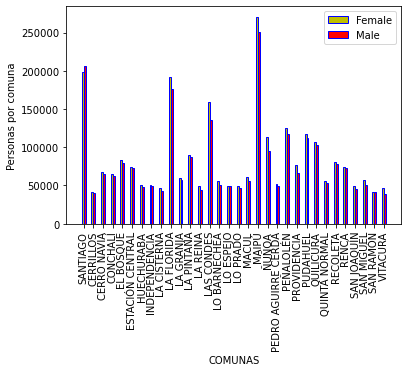

In [64]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
 
# set width of bar 
width = 0.2
# set the y axis of bar 
Male = Pob['Hombres']
Female = Pob['Mujeres']
 
# Set position of bar on X axis 
female_bar = np.arange(len(Female)) 
male_bar = [x + width for x in female_bar] 
 
# Make the plot and set different colors for different genders
# We can also add edgecolor which will give bordercolor between # # the bar 
plt.bar(female_bar, Female, color ='y', width =width, edgecolor ='blue', label ='Female',align='edge') 
plt.bar(male_bar, Male, color ='r', width = width, edgecolor ='blue', label ='Male',align='edge') 
 
# Adding Xlabel
plt.xlabel('COMUNAS') 
# Adding Ylabel
plt.ylabel('Personas por comuna') 
# Adding the years in x axis
plt.xticks([r + width for r in range(len(Female))], Pob['COMUNA']) 
plt.xticks(rotation=90)
plt.legend()

### Depurating lease values

In [65]:
source = requests.get('https://www.buenainversion.cl/blog/valor-metro-cuadrado/').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>Valor del metro cuadrado – Buena Inversión</title>


COMUNA,UF/m2,COMUNA,UF/m2
BUIN,"40,8",PEÑALOLÉN,62
CERRILLOS,"41,8",PROVIDENCIA,"91,6"
COLINA,"64,6",PUDAHUEL,"42,9"
CONCHALÍ,"54,9",PUENTE ALTO,"41,1"
ESTACIÓN CENTRAL,"52,3",QUILICURA,40
HUECHURABA,50,QUINTA NORMAL,"44,5"
INDEPENDENCIA,53,RECOLETA,"55,1"
LA CISTERNA,"51,8",SAN BERNARDO,"45,3"
LA FLORIDA,"54,9",SAN JOAQUÍN,"55,2"
LA REINA,78,SAN MIGUEL,"55,7"


##### View of data in dataframe

In [66]:
dfs = pd.read_html(tab)
df=dfs[0]
df.head()

,COMUNA,UF/m2,COMUNA.1,UF/m2.1
0,BUIN,408,PEÑALOLÉN,62.0
1,CERRILLOS,418,PROVIDENCIA,916.0
2,COLINA,646,PUDAHUEL,429.0
3,CONCHALÍ,549,PUENTE ALTO,411.0
4,ESTACIÓN CENTRAL,523,QUILICURA,40.0


In [67]:
col2=['COMUNA','VALOR_SUP']

In [68]:
m2=pd.DataFrame()

In [69]:
m2 = pd.DataFrame(columns = col2)
m3 = pd.DataFrame(columns = col2)
m2

,COMUNA,VALOR_SUP


#### The number of columns of this dataframe has to be 2 (not 4)

In [71]:
m3['COMUNA']=df['COMUNA.1']
m3['VALOR_SUP']=df['UF/m2.1']

In [72]:
m2['COMUNA']=df['COMUNA']
m2['VALOR_SUP']=df['UF/m2']

In [73]:
result2 = m2.append(m3)
result2.head()

,COMUNA,VALOR_SUP
0,BUIN,408.0
1,CERRILLOS,418.0
2,COLINA,646.0
3,CONCHALÍ,549.0
4,ESTACIÓN CENTRAL,523.0


In [74]:
## reset index
result2 = result2.reset_index()
del result2['index']

result2.VALOR_SUP.loc[0]

408.0

In [75]:
i=0
j=len(result2)
while i<j:
      if (result2.VALOR_SUP.loc[i] > 100):
              result2.VALOR_SUP.loc[i] = result2.VALOR_SUP.loc[i]/10
      i = i+1

C:\Users\preye\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#### Depurating for NaN values

In [76]:
filtro = result2['VALOR_SUP'] > 0
resul_filt = result2[filtro]
resul_filt.head()

,COMUNA,VALOR_SUP
0,BUIN,40.8
1,CERRILLOS,41.8
2,COLINA,64.6
3,CONCHALÍ,54.9
4,ESTACIÓN CENTRAL,52.3


In [77]:
from sklearn import preprocessing

In [81]:
X = resul_filt.VALOR_SUP
# standardize the data attributes
standardized_X = preprocessing.scale(X)
Y = df3.Pob
standardized_Y = preprocessing.scale(Y)
Z = df3.Sup
standardized_Z = preprocessing.scale(Z)
standardized_Z


array([-0.52764841, -0.53628976, -0.57556863, -0.576747  , -0.56299939,
       -0.55985708, -0.44280606, -0.59128018, -0.57949652, -0.34303774,
       -0.57949652, -0.49858205, -0.52843399, -0.2299146 , -0.61475323,
       -0.59128018, -0.59128018, -0.56810565, -0.08654674, -0.5523941 ,
       -0.57949652, -0.4066695 , -0.5626066 ,  0.15501829, -0.39095796,
       -0.56771286, -0.5559292 , -0.5245061 , -0.58067488, -0.57949652,
       -0.59128018, -0.50761619, -0.27312136,  1.13031256, -0.59915638,
        3.19598817,  1.1566294 ,  1.94613462, -0.00995295,  0.22179237,
       -0.33086129,  2.6020917 , -0.61349238,  2.70028887,  2.10325009,
        0.92684803,  2.47639933, -0.12386166, -0.15528476,  0.1235952 ,
       -0.30140214, -0.3477512 ])

In [82]:
resul_filt['V_std']=standardized_X
resul_filt.head()

C:\Users\preye\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,COMUNA,VALOR_SUP,V_std
0,BUIN,40.8,-0.865569
1,CERRILLOS,41.8,-0.810202
2,COLINA,64.6,0.452163
3,CONCHALÍ,54.9,-0.084896
4,ESTACIÓN CENTRAL,52.3,-0.228850


#### Map of Santiago

In [78]:
# create map of Sanriago using latitude and longitude values
map_santiago = folium.Map(location=[-33.45694, -70.64827], zoom_start=10)
map_santiago

#### Viewing district in the map

In [79]:
map_santiago = folium.Map(location=[-33.45694, -70.64827], zoom_start=12)
for lat,lng, Nombre, Provincia in zip(
        df3['Latitud'], 
        df3['Longitud'], 
        df3['Nombre'], 
        df3['Provincia']):
    label = '{}, {}'.format(Provincia,Nombre)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_santiago)  
map_santiago

### We are going to work only with Provincia Santiago

In [86]:
# 
df_stgo = df3[df3['Provincia'].str.contains("Santiago")].reset_index(drop=True)


In [87]:
df_stgo.columns

Index(['Unnamed: 0', 'CUT (Código Único Territorial)', 'Nombre', 'Unnamed: 2',
       'Provincia', 'Región', 'Sup', 'Pob', 'densidad', 'IDH 2005',
       'IDH 2005.1', 'Latitud', 'Longitud'],
      dtype='object')

In [88]:
df_stgo.shape

(32, 13)

In [89]:
map_stgo = folium.Map(location=[-33.45694, -70.64827], zoom_start=12)
for lat,lng, Nombre, Provincia in zip(
        df_stgo['Latitud'], 
        df_stgo['Longitud'], 
        df_stgo['Nombre'], 
        df_stgo['Provincia']):
    label = '{}, {}'.format(Provincia,Nombre)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stgo)  
map_stgo

### Foursuare: Explore location "Providencia"

In [118]:
CLIENT_ID = 'JWOZC2AQDRUIOV213C2N0JDIJZG1FHVBOZF52NVACQMDD22E'
CLIENT_SECRET = '0CDHNDSOMPLV5QJISLJCTWT0WPLDNS51EL4UTO3P1CPC5XXB'
VERSION = '20180605'
LIMIT = 100

In [112]:
neighborhood_name = df_stgo.loc[22, 'Nombre']
print(f" Nombre's choose is '{neighborhood_name}'.")

 Nombre's choose is 'Providencia'.


In [113]:
neighborhood_latitude = df_stgo.loc[22, 'Latitud'] # neighborhood latitude value
neighborhood_longitude = df_stgo.loc[22, 'Longitud'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Providencia are -33.435, -70.616.


## 1st Clustering in Stgo

In [98]:
df_stgo.columns

Index(['Unnamed: 0', 'CUT (Código Único Territorial)', 'Nombre', 'Unnamed: 2',
       'Provincia', 'Región', 'Sup', 'Pob', 'densidad', 'IDH 2005',
       'IDH 2005.1', 'Latitud', 'Longitud'],
      dtype='object')

In [106]:
k=4; ### 1st test
stgo_clustering = df_stgo.drop(['Unnamed: 0', 'CUT (Código Único Territorial)', 'Nombre', 'Unnamed: 2',
       'Provincia', 'Región', 'Sup', 'Pob', 'densidad', 'IDH 2005',
       'IDH 2005.1'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(stgo_clustering)
kmeans.labels_
df_stgo.insert(0, 'Cluster Labels', kmeans.labels_)

#### Choosing K for first clustering, only geographic.

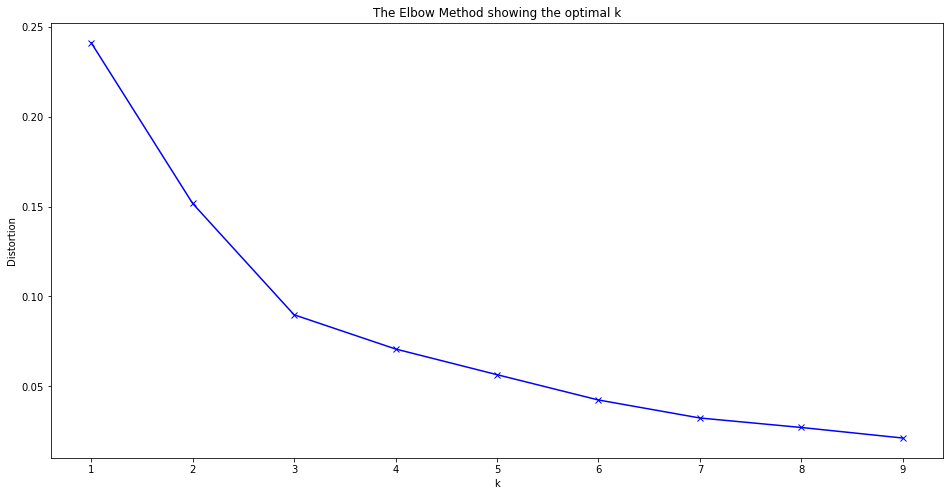

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline 

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(stgo_clustering)
    distortions.append(kmeanModel.inertia_)
# Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Viewing CLuster with only lat and long

In [108]:
# create map
map_clusters = folium.Map(location=[-33.45694, -70.64827],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, Nombre, cluster in zip(df_stgo['Latitud'], df_stgo['Longitud'], df_stgo['Nombre'], df_stgo['Cluster Labels']):
    label = '{}, {}, {}'.format(Provincia,Nombre,' Cluster ' + str(cluster))
    label = folium.Popup(label, parse_html=True)
    # label = '{}, {}'.format(Provincia,Nombre)
    # label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],        
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Viewing detail for each Cluster

In [ ]:
# CLUSTER 1

df_stgo.loc[df_stgo['Cluster Labels'] == 0, df_stgo.columns[[3] + list(range(0, df_stgo.shape[1]))]]

In [ ]:
# CLUSTER 2

df_stgo.loc[df_stgo['Cluster Labels'] == 1, df_stgo.columns[[3] + list(range(0, df_stgo.shape[1]))]]

In [ ]:
# CLUSTER 3

df_stgo.loc[df_stgo['Cluster Labels'] ==2, df_stgo.columns[[3] + list(range(0, df_stgo.shape[1]))]]

In [ ]:
# CLUSTER 4

df_stgo.loc[df_stgo['Cluster Labels'] == 3, df_stgo.columns[[3] + list(range(0, df_stgo.shape[1]))]]

In [ ]:
# CLUSTER 5

df_stgo.loc[df_stgo['Cluster Labels'] == 4, df_stgo.columns[[3] + list(range(0, df_stgo.shape[1]))]]

## Obtaining information from Foursquare

### Now, explore and cluster all neighbours in Región Metropolitana de Santiago

In [119]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [163]:
stgo_venues = getNearbyVenues(names=df_stgo['Nombre'],
                                   latitudes=df_stgo['Latitud'],
                                   longitudes=df_stgo['Longitud']
                                  )

In [164]:
stgo_venues

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Santiago,-33.437222,-70.657222,Plaza de Bolsillo - Santiago Centro,-33.436778,-70.655481,Plaza
1,Santiago,-33.437222,-70.657222,Starbucks,-33.437938,-70.657007,Coffee Shop
2,Santiago,-33.437222,-70.657222,Bambudda,-33.438987,-70.655631,Asian Restaurant
3,Santiago,-33.437222,-70.657222,Amanda's,-33.439206,-70.658247,Arepa Restaurant
4,Santiago,-33.437222,-70.657222,YMCA,-33.439060,-70.656257,Pool
...,...,...,...,...,...,...,...
462,Vitacura,-33.400000,-70.600000,Hotel Director,-33.402812,-70.595808,Hotel
463,Vitacura,-33.400000,-70.600000,Louis Vuitton,-33.401662,-70.595735,Boutique
464,Vitacura,-33.400000,-70.600000,Dap Ducasse,-33.403355,-70.598241,Furniture / Home Store
465,Vitacura,-33.400000,-70.600000,Salcobrand,-33.398748,-70.597841,Pharmacy


In [165]:
stgo_venues.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Cerrillos,4,4,4,4,4,4
Cerro Navia,4,4,4,4,4,4
Conchalí,5,5,5,5,5,5
El Bosque,2,2,2,2,2,2
Estación Central,5,5,5,5,5,5
Huechuraba,3,3,3,3,3,3
Independencia,6,6,6,6,6,6
La Cisterna,13,13,13,13,13,13
La Granja,1,1,1,1,1,1


In [177]:
Bakery = stgo_venues[stgo_venues['Venue Category'] =='Bakery']
Bakery.head()
Bakery.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
La Cisterna,1,1,1,1,1,1
La Reina,1,1,1,1,1,1
Las Condes,3,3,3,3,3,3
Lo Prado,1,1,1,1,1,1
Providencia,1,1,1,1,1,1
Santiago,3,3,3,3,3,3
Ñuñoa,3,3,3,3,3,3


### Warning: Foursquare is not many popular, scarce information. Therefore it is decided to work with all venues

In [145]:
print('There are {} uniques categories.'.format(len(stgo_venues['Venue Category'].unique())))

There are 130 uniques categories.


In [124]:
# one hot encoding
stgo_onehot = pd.get_dummies(stgo_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
stgo_onehot['Neighbourhood'] = stgo_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [stgo_onehot.columns[-1]] + list(stgo_onehot.columns[:-1])
toronto_onehot = stgo_onehot[fixed_columns]

stgo_onehot.head()

,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,...,Thai Restaurant,Theater,Trail,Veterinarian,Video Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Santiago
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Santiago
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Santiago
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Santiago
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Santiago


In [125]:
# examine the new dataframe size.

stgo_onehot.shape

(467, 131)

In [126]:

# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

stgo_grouped = stgo_onehot.groupby('Neighbourhood').mean().reset_index()
stgo_grouped

,Neighbourhood,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,...,Tennis Court,Thai Restaurant,Theater,Trail,Veterinarian,Video Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Cerrillos,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
1,Cerro Navia,0.000000,0.0,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
2,Conchalí,0.000000,0.0,0.000000,0.000000,0.00,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
3,El Bosque,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
4,Estación Central,0.000000,0.2,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
5,Huechuraba,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
6,Independencia,0.000000,0.0,0.000000,0.000000,0.00,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
7,La Cisterna,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
8,La Granja,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
9,La Pintana,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


In [127]:

# confirm the new size

stgo_grouped.shape

(31, 131)

In [128]:
# print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in stgo_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = stgo_grouped[stgo_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Cerrillos----
                   venue  freq
0                  Plaza  0.25
1   Fast Food Restaurant  0.25
2          Grocery Store  0.25
3             Restaurant  0.25
4  Outdoors & Recreation  0.00


----Cerro Navia----
                  venue  freq
0  Cantonese Restaurant  0.25
1  Arts & Entertainment  0.25
2              Dive Bar  0.25
3                  Café  0.25
4      Arepa Restaurant  0.00


----Conchalí----
                             venue  freq
0                            Plaza   0.2
1  Southern / Soul Food Restaurant   0.2
2             Fast Food Restaurant   0.2
3                 Asian Restaurant   0.2
4                     Liquor Store   0.2


----El Bosque----
              venue  freq
0       Pizza Place   0.5
1  Department Store   0.5
2  Arepa Restaurant   0.0
3             Plaza   0.0
4          Pie Shop   0.0


----Estación Central----
                                      venue  freq
0                    Argentinian Restaurant   0.2
1  Residential Building (A

In [129]:
# sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [130]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = stgo_grouped['Neighbourhood']

for ind in np.arange(stgo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(stgo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cerrillos,Fast Food Restaurant,Plaza,Restaurant,Grocery Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Farmers Market,Deli / Bodega
1,Cerro Navia,Cantonese Restaurant,Arts & Entertainment,Dive Bar,Café,Diner,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Yoga Studio
2,Conchalí,Fast Food Restaurant,Plaza,Liquor Store,Asian Restaurant,Southern / Soul Food Restaurant,Dive Bar,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop
3,El Bosque,Pizza Place,Department Store,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Dessert Shop,Diner
4,Estación Central,Argentinian Restaurant,Food Truck,Residential Building (Apartment / Condo),Restaurant,Japanese Restaurant,Yoga Studio,Diner,Electronics Store,Donut Shop,Dive Bar


### Running Kmeans with all neigbourhood in Santiago

## Choosing K, Pending implement a integrated data frame and normalize it

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline 

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(stgo_grouped_clustering)
    distortions.append(kmeanModel.inertia_)
# Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

NameError: name 'stgo_grouped_clustering' is not defined

In [ ]:

# Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters
kclusters = 5

stgo_grouped_clustering = stgo_grouped.drop('Neighbourhood', 1) 

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(stgo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:40]



In [ ]:

# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

stgo_merged = stgo_grouped

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
stgo_merged = stgo_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
#stgo_merged.insert(0, 'Cluster Labels', kmeans.labels_)
stgo_merged.head() # check the last columns!

In [ ]:
stgo_merged['Lat']=df_stgo['Latitud']
stgo_merged['Lng']=df_stgo['Longitud']
stgo_merged

In [ ]:

# Finally, let's visualize the resulting clusters

# create map
map_clusters2 = folium.Map(location=[-33.45694, -70.64827], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(stgo_merged['Lat'], stgo_merged['Lng'], stgo_merged['Neighbourhood'], stgo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

### View of details for each cluster

In [ ]:
# CLUSTER 1

stgo_merged.loc[stgo_merged['Cluster Labels'] == 0, stgo_merged.columns[[0] + list(range(5, stgo_merged.shape[1]))]]

In [ ]:
# CLUSTER 2

stgo_merged.loc[stgo_merged['Cluster Labels'] == 1, stgo_merged.columns[[0] + list(range(5, stgo_merged.shape[1]))]]

In [ ]:
# CLUSTER 3

stgo_merged.loc[stgo_merged['Cluster Labels'] == 2, stgo_merged.columns[[0] + list(range(5, stgo_merged.shape[1]))]]

In [ ]:
# CLUSTER 4

stgo_merged.loc[stgo_merged['Cluster Labels'] == 3, stgo_merged.columns[[0] + list(range(5, stgo_merged.shape[1]))]]

In [ ]:
# CLUSTER 5

stgo_merged.loc[stgo_merged['Cluster Labels'] == 4, stgo_merged.columns[[0] + list(range(5, stgo_merged.shape[1]))]]

### imagen en caso de no ser visible en github

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("clus_preyes_all.png")

### let's look correlation in dataset

In [134]:
filtro2 = df3['Pob'] > 150
df4=df3[filtro2]
corr=df4.corr()
corr


,Unnamed: 0,CUT (Código Único Territorial),Unnamed: 2,Sup,Pob,densidad,IDH 2005,Latitud,Longitud
Unnamed: 0,1.000000,0.724780,NaN,0.454291,-0.029356,-0.588633,-0.181176,0.224454,-0.093518
CUT (Código Único Territorial),0.724780,1.000000,NaN,0.568845,0.065592,-0.430419,-0.275010,0.051624,-0.097398
Unnamed: 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sup,0.454291,0.568845,NaN,1.000000,-0.097445,-0.439882,-0.137665,0.626906,-0.125287
Pob,-0.029356,0.065592,NaN,-0.097445,1.000000,0.023609,0.373245,-0.420047,0.114395
densidad,-0.588633,-0.430419,NaN,-0.439882,0.023609,1.000000,0.088923,-0.083498,0.087531
IDH 2005,-0.181176,-0.275010,NaN,-0.137665,0.373245,0.088923,1.000000,0.063505,0.167687
Latitud,0.224454,0.051624,NaN,0.626906,-0.420047,-0.083498,0.063505,1.000000,-0.229530
Longitud,-0.093518,-0.097398,NaN,-0.125287,0.114395,0.087531,0.167687,-0.229530,1.000000


### viewing density

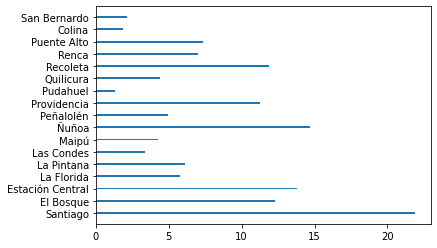

In [135]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.barh(df4['Nombre'],df4['densidad'],0.15)
# As the name of technologies are too long,
# let us rotate the title of x axis by 90 degree.
#plt.xticks(rotation=90)
# without the plt.show(), the bar will not be created
plt.show()

### Viewing value of lease by district

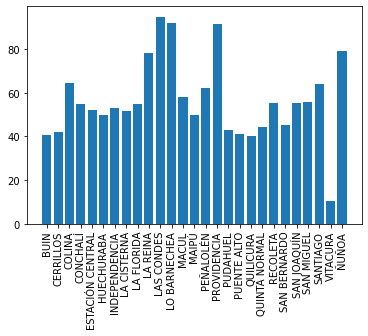

In [136]:
import matplotlib.pyplot as plt
plt.bar(x=resul_filt['COMUNA'],height=resul_filt['VALOR_SUP'])
# As the name of technologies are too long,
# let us rotate the title of x axis by 90 degree.
plt.xticks(rotation=90)
# without the plt.show(), the bar will not be created
plt.show()

### Viewing Population

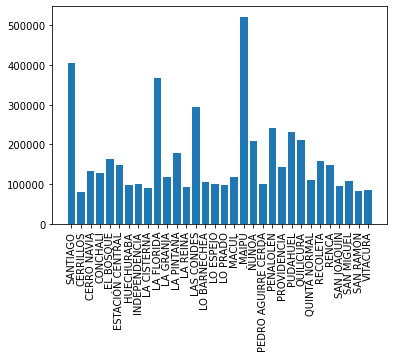

In [137]:
import matplotlib.pyplot as plt
plt.bar(x=Pob['COMUNA'],height=Pob['TOTAL'])
# As the name of technologies are too long,
# let us rotate the title of x axis by 90 degree.
plt.xticks(rotation=90)
# without the plt.show(), the bar will not be created
plt.show()

### Viewing Heat Map: Population, density and surface

<AxesSubplot:>

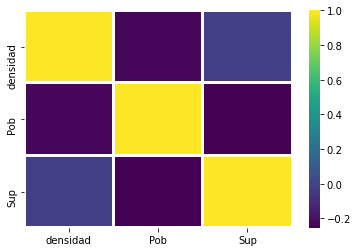

In [138]:
#using pip install seaborn.

#We will use the above data to see how seaborn heatmaps can be created.
# create a dataframe with the above values and column names 
columns={'Sup','Pob','densidad'}
dataset=pd.DataFrame(data=df3,columns=columns)
 
# to find the correlation, use corr() method on the dataset
corr=dataset.corr()
# import the seaborn library and give alias as sns
import seaborn as sns
# use heatmap function, set the color as viridis and
# make each cell seperate using linewidth parameter
sns.heatmap(corr,linewidths=2,cmap="viridis")

### Loading geoJason file

In [156]:
import json
import requests


In [140]:
pip install --ignore-installed pyproj==2.4.0

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\preye\\Anaconda3\\Lib\\site-packages\\pyproj\\_datadir.cp36-win32.pyd'
Consider using the `--user` option or check the permissions.




  Using cached pyproj-2.4.0-cp36-cp36m-win32.whl (22.4 MB)


In [141]:
world_geo = r'd:comunas_santiago.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[-33.45694, -70.64827], zoom_start=2)
world_geo

'd:comunas_santiago.json'

In [142]:
m = folium.Map([-33.45694, -70.64827], zoom_start=4)

folium.GeoJson(world_geo,).add_to(m)
m

### Choropleth map with pupulation

In [143]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df3,
    columns=['Nombre', 'Pob'],
    key_on='feature.properties.nombre',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Poblacion'
)

# display map
world_map

### Final Clustering, results and conclusions will be colpleted next week